# test on the plot functions

In [1]:
from mytools.plot import *
%matplotlib inline

## gen test data

In [2]:
shape = (120, 120)
test_data = np.zeros(shape)

# generate a test data with two circular peaks 
x, y = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]))
test_data += np.exp(-((x-40)**2 + (y-60)**2)/100)
test_data += np.exp(-((x-80)**2 + (y-60)**2)/100)

# add noise
noisy_test_data = test_data + np.random.randn(*shape)/20

## plot heatmap

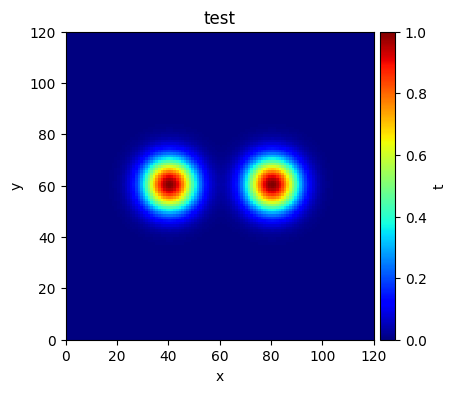

In [3]:
plot_heatmap(test_data, cbt='t', title='test', xlabel='x', ylabel='y');

## add ticks

In [4]:
lim = (-3, 3)
ticks, ticklabels = get_ticks_labels()
print(ticklabels)

['-2', '0', '2']


<Axes: title={'center': 'random test'}, xlabel='x', ylabel='y'>

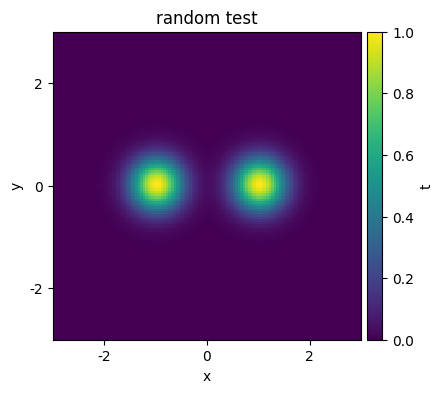

In [5]:
fig, ax,_,_ = plot_heatmap(test_data, cbt='t', xlabel='x', ylabel='y', title='random test', cmap='viridis')
set_ticks(ax, ticks, ticklabels)

## plot multiple heatmaps

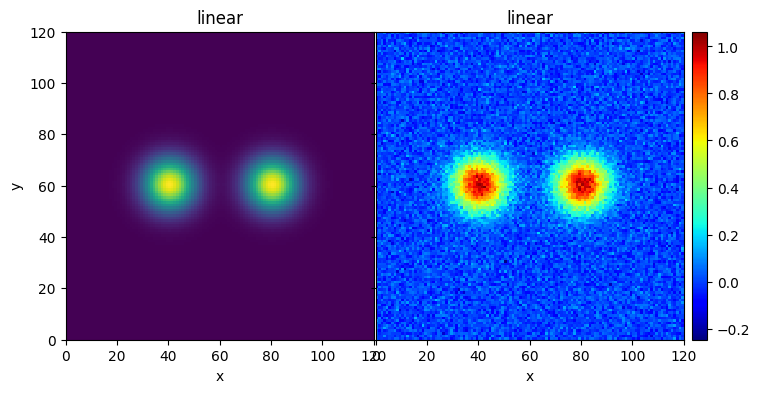

In [6]:
norm = 'linear'
plot_heatmaps([test_data, noisy_test_data], norm=norm, cbt=[None, ''], xlabel='x', ylabel='y', title=norm, cmap=['viridis', 'jet'], sharey=True);

## plot residuals (comparision of HI only and HI plus noise)

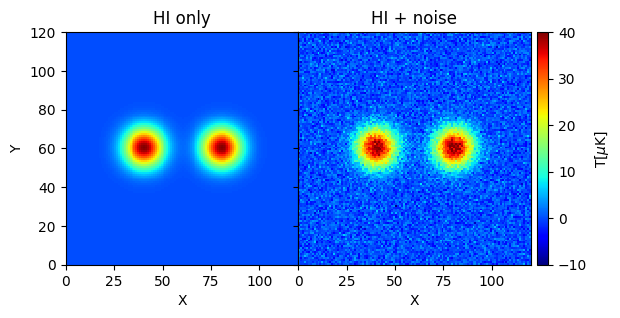

In [7]:
fig, axes, _ =  plot_residuals([test_data*40, noisy_test_data*40])

## plot lines

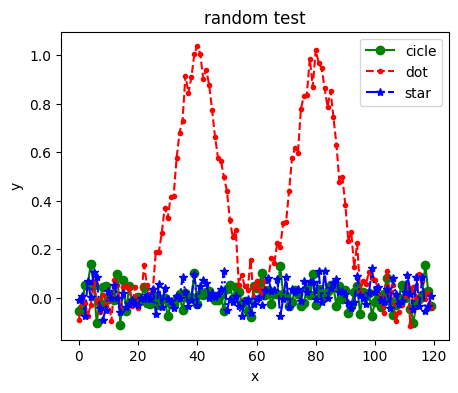

In [8]:
plot_line(x=[range(shape[1])]*3,y=[noisy_test_data[80], noisy_test_data[60], noisy_test_data[40]], 
          xlabel='x', ylabel='y', title='random test', 
          label=['cicle', 'dot', 'star'], 
          color=[ 'green', 'red', 'blue'],
          marker=['o', '.', '*'],
          linestyle=['-', '--', '-.']);

## plot profiles

In [9]:
## generate test  data, including gaussian profile and random data
xx = np.linspace(-3, 3, 120)
yy = np.exp(-xx**2/0.5) * 5

xx_ = np.linspace(-0.5, 0.5, 20)
yy_ = np.random.random((20))

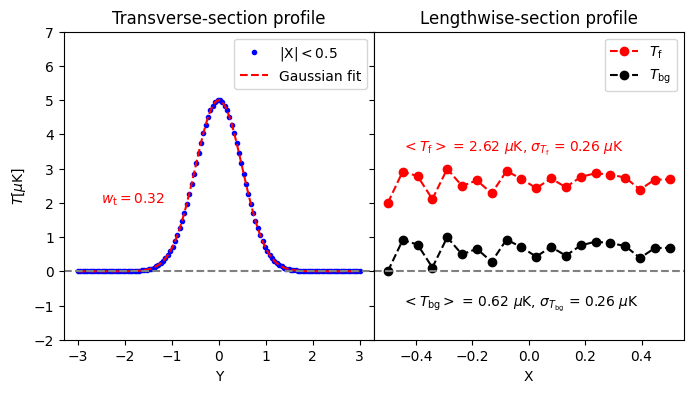

In [10]:
text_pos = [
    [-0.45, 3.5], 
    [-0.45, -1], 
    [-2.5, 2],
]
fig, axes = make_figure(1,2, figsize=(8,4), sharey=True, sharex=False, subplot_kw={})

plot_profile_2c(x=[xx, xx, xx_, xx_],y=[yy, yy, yy_+2, yy_ ], fontsize=10, fig=fig, axes=axes, text_pos=text_pos)

axes[0].set_ylim([-2, 7]);

/home/dyliu/miniconda3/envs/test/lib/python3.9/site-packages/mytools/plot.py:411: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()  # type: ignore


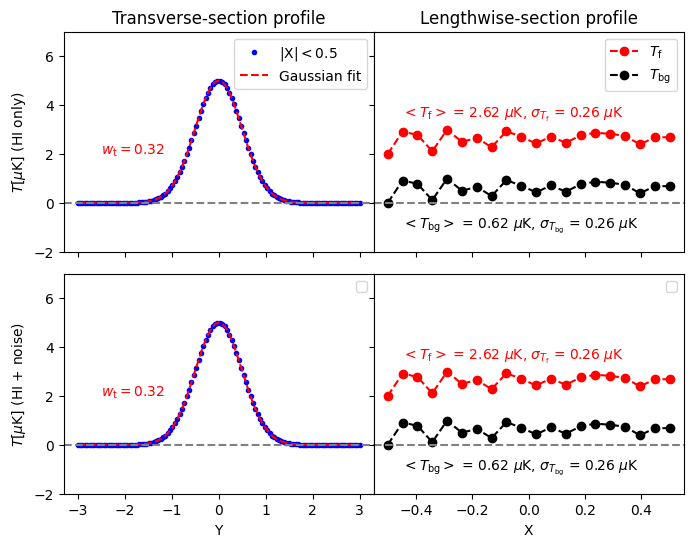

In [11]:
fig, axes = make_figure(2,2, figsize=(8,6), sharey=True, sharex='col', subplot_kw={})
plot_profile_2c2r(x=[xx, xx, xx_, xx_]*2,y=[yy, yy, yy_+2, yy_]*2, fontsize=[10,10], fig=fig, axes=axes, text_pos=[text_pos]*2);

axes[0,0].set_ylim([-2, 7]);

# plot circles and arcs

(-5.0, 5.0)

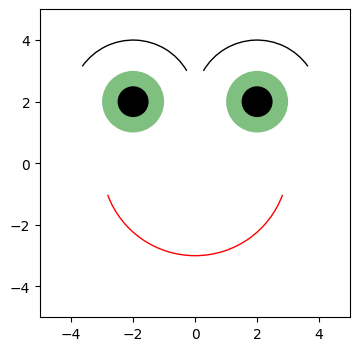

In [12]:
fig, ax = plt.subplots(figsize=(4,4))
plot_ellipses(ax, [[-2,2],[-2,2],[2,2],[2,2]], [2,1,2,1], fc=['g', 'k', 'g', 'k'], alpha=[0.5, 1]*2)
plot_arcs(ax, [[-2,2],[2,2], [0,0]], [4,4, 6], theta1=[30, 35, 200], theta2=[145,150, 340], ec=['k','k', 'r'])
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])